In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import pickle

In [3]:
dataset = pd.read_csv('insurance_pre.csv')
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [5]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


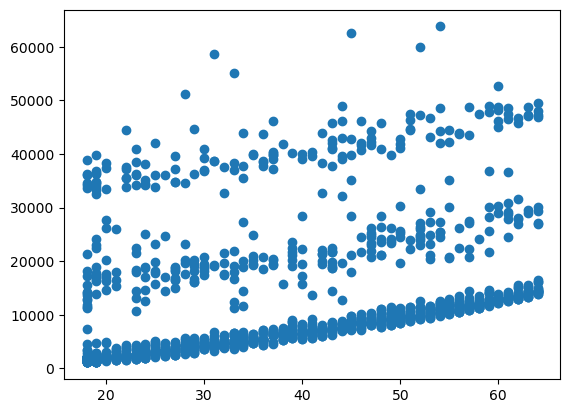

In [7]:
plt.plot(dataset[['age']],dataset[['charges']],'o')

(array([  20.,  225., 1002.]),
 array([15. , 18.5, 25. , 40. ]),
 <BarContainer object of 3 artists>)

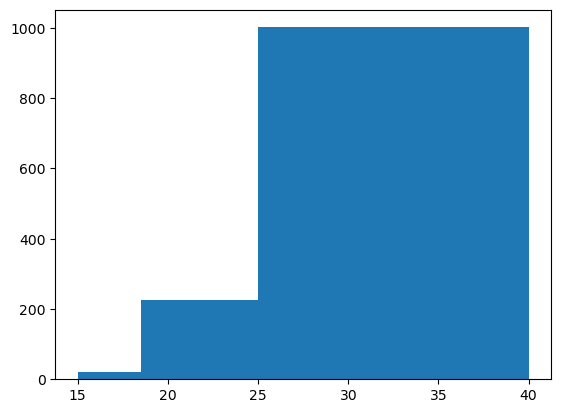

In [9]:
plt.hist(dataset[['bmi']],bins=[15,18.5,25.0,40])

(array([574., 324., 240., 157.,  43.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

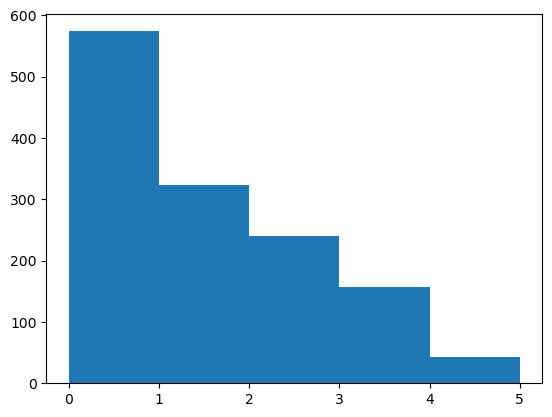

In [11]:
plt.hist(dataset[['children']],bins=[0,1,2,3,4,5])

{'whiskers': [<matplotlib.lines.Line2D at 0x1cb0034c200>,
 'caps': [<matplotlib.lines.Line2D at 0x1cb0034c6b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cb04f58830>],
 'medians': [<matplotlib.lines.Line2D at 0x1cb0034cb00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cb0034cdd0>],
 'means': []}

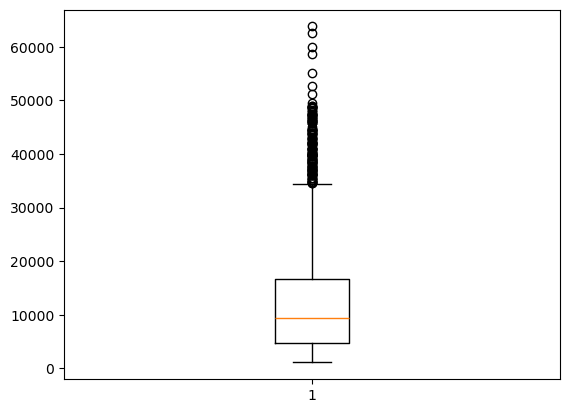

In [13]:
plt.boxplot(dataset[['charges']])

In [15]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [17]:
dataset=pd.get_dummies(dataset,drop_first='True',dtype=int)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [19]:
independent = dataset[['age', 'sex_male', 'bmi', 'children', 'smoker_yes']]
dependent = dataset[['charges']]

In [21]:
x_train,x_test,y_train,y_test = train_test_split(independent,dependent,test_size=0.3,random_state = None)
y_train

,charges
963,9500.57305
978,9704.66805
1321,28101.33305
951,47462.89400
1230,60021.39897
...,...
1224,6858.47960
1199,4934.70500
1324,4239.89265
197,8516.82900


In [23]:
regressor = LinearRegression()
model = regressor.fit(x_train,y_train)

In [25]:
y_pred = model.predict(x_test)

In [27]:
r_score = r2_score(y_pred,y_test)
r_score

0.6463547332053758

In [181]:
regressor = RandomForestRegressor(criterion='poisson',n_estimators=100)
model = regressor.fit(x_train,y_train)

C:\Users\prabh\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [182]:
y_pred = model.predict(x_test)
r_score = r2_score(y_pred,y_test)
r_score

0.7964313149494926

In [195]:
final_model = open("RF_InsuranceChargePrediction.sav",'wb+')
pickle.dump(model,final_model)
final_model.close()

In [199]:
x_test

,age,sex_male,bmi,children,smoker_yes
611,38,0,34.800,2,0
822,18,0,31.130,0,0
305,29,1,33.345,2,0
554,25,0,41.325,0,0
1299,19,0,25.745,1,0
...,...,...,...,...,...
1317,18,1,53.130,0,0
153,42,0,23.370,0,1
177,54,1,29.200,1,0
1233,58,1,23.300,0,0
